In [1]:
import sys
!pip install pyspark 
from pyspark import SparkContext, SparkConf
import matplotlib.pyplot as plt
sc = SparkContext("local","Project3-K-means")

In [2]:
#This should be used only when running this on google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import the input file. I have just considered just a small portion of the file as system has very less resources. You can use the main input file path
file1 = '/content/gdrive/My Drive/CS5683/data.txt'
fileRDD = sc.textFile(file1, minPartitions=20)

In [4]:
items = fileRDD.map(lambda line:line.split())

data = items.map(lambda x: [float(i) for i in x]).zipWithIndex().map(lambda x:(x[1],x[0]))

In [5]:
sample = sc.parallelize(data.takeSample(False, 10))
centroids = sample.map(lambda point : point[1])
centroids1 =  centroids.zipWithIndex().map(lambda point : (point[1], point[0]))

In [6]:
columns = len(items.take(1)[0])
rows = items.count()

In [7]:
centroids_list = sc.broadcast(centroids1.collect())
centroids_list_man = sc.broadcast(centroids1.collect())

In [9]:
with open("/content/gdrive/My Drive/CS5683/Kmeans_centroids.txt", 'w') as output:
    for row in centroids_list.value:
        output.write(str(row) + '\n')

In [10]:
def Euclidian_distance(x):
  list1 = []
  for j in centroids_list.value:
    count = 0
    for i in range(0,columns):
      count = count + (j[1][i]-x[1][i]) * (j[1][i]-x[1][i])
    count = count**.5 #"{:.2f}".format(6.737391260718053)
    list1.append([j[0],count])
  return (x[0],list1)

In [11]:
maxiterations = 20
cost_functions_eu = {}
for i in range(0,maxiterations):
  assigned_clusters = data.map(Euclidian_distance).map(lambda a: (a[0], min((x for x in a[1]), key=lambda k:k[1])))
  #print(assigned_clusters.take(2))
  cost_function_eu = assigned_clusters.map(lambda x: x[1][1]*x[1][1]).sum()
  cost_functions_eu[i+1]  = cost_function_eu
  #new_centroids 
  new_centroids = assigned_clusters.join(data).map(lambda x: (x[1][0][0],x[1][1])).groupByKey().map(lambda x: (x[0], list(x[1]))).map(lambda c: (c[0], [sum(col)/len(col) for col in zip(*c[1])]))
  #print(centroids1.take(2))
  centroids_list = sc.broadcast(new_centroids.collect())
  print('iter #' + str(i+1) + ' : ' + str(cost_function_eu))

iter #1 : 1079990240.583616
iter #2 : 805701368.279913
iter #3 : 719077517.3632215
iter #4 : 672399693.2709783
iter #5 : 593396760.2602544
iter #6 : 548391467.7227613
iter #7 : 530917899.64427626
iter #8 : 516859316.80842566
iter #9 : 503358946.6261691
iter #10 : 493446011.3814063
iter #11 : 485631702.4429093
iter #12 : 479948533.6113337
iter #13 : 475758315.63260746
iter #14 : 472215350.9168195
iter #15 : 469282393.4021713
iter #16 : 467579091.9258087
iter #17 : 466440762.945261
iter #18 : 465314481.8674571
iter #19 : 464509537.7932474
iter #20 : 463922402.45472836


In [12]:
perc_change = (cost_functions_eu[1]-cost_functions_eu[10])/cost_functions_eu[1]

In [13]:
perc_change

0.5431014162546941

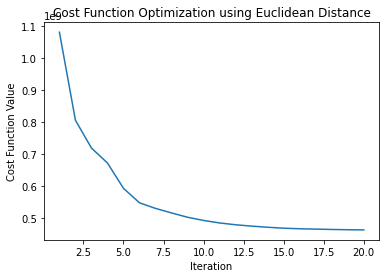

In [14]:
plt.title('Cost Function Optimization using Euclidean Distance')
plt.ylabel('Cost Function Value')
plt.xlabel('Iteration')
plt.plot(list(cost_functions_eu.keys()),list(cost_functions_eu.values()))

In [15]:
def manhattan_distance(x):
  list1 = []
  for j in centroids_list_man.value:
    count = 0
    for i in range(0,columns):
      count = count + abs(j[1][i]-x[1][i])
    count = count**.5 #"{:.2f}".format(6.737391260718053)
    list1.append([j[0],count])
    
  return (x[0],list1)

In [16]:
maxiterations = 20
cost_functions_man = {}
for i in range(0,maxiterations):
  assigned_clusters_man = data.map(manhattan_distance).map(lambda a: (a[0], min((x for x in a[1]), key=lambda k:k[1])))#centroids1.cartesian(data).map(distance).groupByKey().map(lambda x: (x[0], list(x[1]))).map(lambda a: (a[0], min((x for x in a[1]), key=lambda k:k[1])))
  #print(assigned_clusters.take(2))
  cost_function_man = assigned_clusters_man.map(lambda x: x[1][1]*x[1][1]).sum()
  cost_functions_man[i+1]  = cost_function_man
  #new_centroids 
  new_centroids_man = assigned_clusters_man.join(data).map(lambda x: (x[1][0][0],x[1][1])).groupByKey().map(lambda x: (x[0], list(x[1]))).map(lambda c: (c[0], [sum(col)/len(col) for col in zip(*c[1])]))
  #print(centroids1.take(2))
  centroids_list_man = sc.broadcast(new_centroids_man.collect())
  print('iter #' + str(i+1) + ' : ' + str(cost_function_man))

iter #1 : 655942.0750000001
iter #2 : 600441.8604432187
iter #3 : 595684.5965909276
iter #4 : 581278.9651913998
iter #5 : 552403.4362422823
iter #6 : 540456.377536856
iter #7 : 536587.3803074257
iter #8 : 532444.4724022921
iter #9 : 534593.2799366666
iter #10 : 533536.9177890058
iter #11 : 530612.044723087
iter #12 : 523319.5506512184
iter #13 : 517130.1116860292
iter #14 : 510916.2912278206
iter #15 : 504067.02403995296
iter #16 : 501572.29323034495
iter #17 : 497676.5503688975
iter #18 : 492970.4108330269
iter #19 : 491642.48634151754
iter #20 : 491507.4183713972


In [17]:
perc_change_man = (cost_functions_man[1]-cost_functions_man[10])/cost_functions_man[1]

In [18]:
perc_change_man

0.18660970514964187

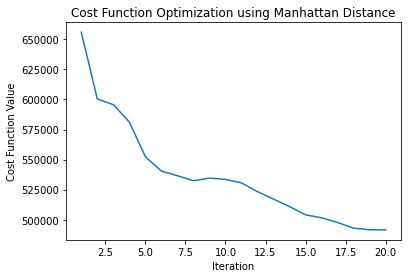

In [19]:
plt.title('Cost Function Optimization using Manhattan Distance')
plt.ylabel('Cost Function Value')
plt.xlabel('Iteration')
plt.plot(list(cost_functions_man.keys()),list(cost_functions_man.values()))